# **Final Project Task 1 -Census Data Preprocess**

Requirements

- Encode data
- Handle missing values if any
- Correct errors, inconsistencies, remove duplicates if any
- Outlier detection and treatment if any
- Normalization / Standardization if necesarry
- Feature engineering
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [42]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values="?", skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Encode data

In [43]:
# Identifying categorical variables
categorical_features = data.select_dtypes(include=['object']).columns

# Coding the variable 'income' into a binary variable 
label_encoder = LabelEncoder()
data["income"] = label_encoder.fit_transform(data["income"])  # <=50K -> 0, >50K -> 1

data["sex"] = label_encoder.fit_transform(data["sex"])  # Male -> 1, Female -> 0

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


## Missing values

In [44]:
#Pas 2:  Handle missing values if any 
print("\nmissingvalues:")
print(data.isnull().sum())


missingvalues:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [45]:
# Handle missing values - replace with mode
for column in ["workclass", "occupation", "native-country"]:
    mode = data[column].mode()[0]  
    data[column].fillna(mode, inplace=True)  

# checking for missing values after replacement
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


C:\Users\Iulia\AppData\Local\Temp\ipykernel_11744\1029541431.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode, inplace=True)


## Duplicates

In [46]:
# Pas 3: Correct errors, inconsistencies, remove duplicates if any 
print("\nnumber of duplicates:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("number of duplicates after elimination:", data.duplicated().sum())


number of duplicates: 24
number of duplicates after elimination: 0


In [47]:
data.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,0.669238,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,0.470495,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


## Outliers

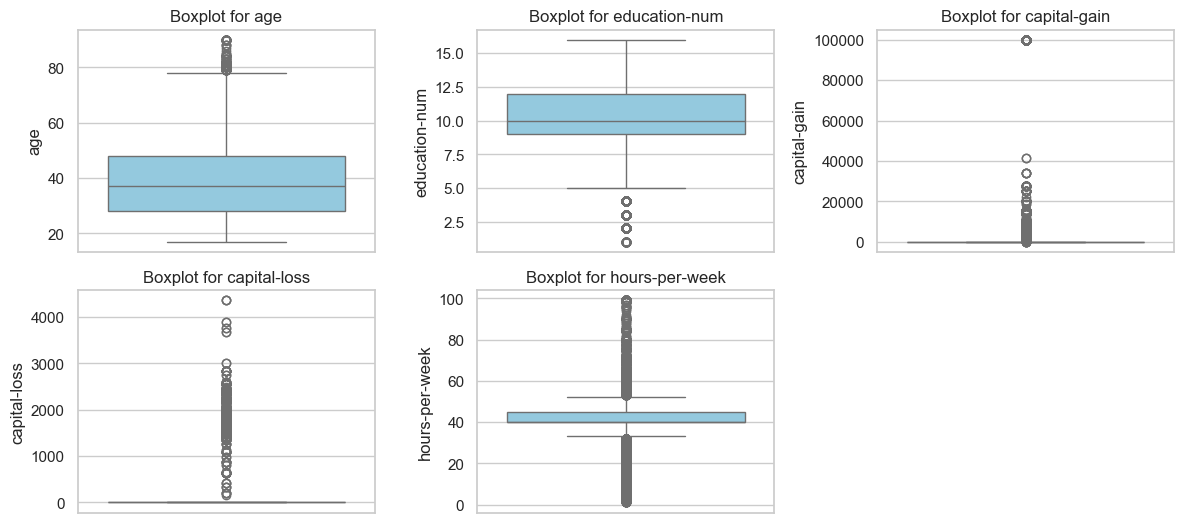

In [48]:
#boxplots for outliers detection
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(y=data[col], color="skyblue")  
    plt.title(f"Boxplot for {col}") 

plt.tight_layout()  
plt.show()

In [49]:
#Outliers detection

def detect_outliers_iqr(data, column): 
    
#Calculate quantiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

#Calculate upper and lower bounds
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

#Identify outliers
    outliers = data[(data[column]< lower_bound) | (data[column]> upper_bound)]

# Add outlier column for identification
    data[f'outlier_{column}'] = (data[column] < lower_bound) | (data[column] > upper_bound)

    return data


numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    data = detect_outliers_iqr(data, col)

outlier_columns = [col for col in data.columns if col.startswith("outlier_")]
outlier_counts = data[outlier_columns].sum()
print(outlier_counts)

outlier_age                  0
outlier_fnlwgt             152
outlier_education-num        0
outlier_sex                  0
outlier_capital-gain      2712
outlier_capital-loss      1519
outlier_hours-per-week    4375
outlier_income            7839
dtype: int64


In [50]:
# outlieri treatment - remove outliers with the biggest values seen in boxplots
data = data[data ['age'] < 75]
data = data[(data['hours-per-week'] < 45) & (data['hours-per-week'] > 10)]
data = data[data['capital-gain']<25000]
data = data[data['capital-loss'] < 2500]


In [51]:
data.describe()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income
count,22552.000000,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,37.431713,1.924466e+05,9.802190,0.612939,403.128902,70.852785,36.233505,0.177102
std,13.506839,1.059542e+05,2.472038,0.487089,1882.704078,356.054249,7.239029,0.381763
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,26.000000,1.199905e+05,9.000000,0.000000,0.000000,0.000000,35.000000,0.000000
50%,36.000000,1.806765e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.393532e+05,11.000000,1.000000,0.000000,0.000000,40.000000,0.000000
max,74.000000,1.484705e+06,16.000000,1.000000,22040.000000,2489.000000,44.000000,1.000000


In [52]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,native-country,income,outlier_age,outlier_fnlwgt,outlier_education-num,outlier_sex,outlier_capital-gain,outlier_capital-loss,outlier_hours-per-week,outlier_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,...,United-States,0,False,False,False,False,True,False,False,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,...,United-States,0,False,False,False,False,False,False,True,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,...,United-States,0,False,False,False,False,False,False,False,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,...,United-States,0,False,False,False,False,False,False,False,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,...,Cuba,0,False,False,False,False,False,False,False,False


## Feature engineering

In [53]:
#Simplification of level of education 
education_levels = {
    'Preschool': 1,
    '1st-4th': 1,
    '5th-6th': 1,
    '7th-8th': 1,
    '9th': 2,
    '10th': 2,
    '11th': 2,
    '12th': 2,
    'HS-grad': 2,
    'Some-college': 2,
    'Assoc-voc': 2,
    'Assoc-acdm': 2,
    'Bachelors': 3,
    'Masters': 3,
    'Doctorate': 4,
    'Prof-school': 4
}
data['education_simplified'] = data['education'].map(education_levels)

# new variable that indicates if people work full time or not 
data['full_time'] = (data['hours-per-week'] > 40).astype(int)

In [54]:
# deleting categorical variables
data = data.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])
data.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,outlier_age,outlier_fnlwgt,outlier_education-num,outlier_sex,outlier_capital-gain,outlier_capital-loss,outlier_hours-per-week,outlier_income,education_simplified,full_time
0,39,77516,13,1,2174,0,40,0,False,False,False,False,True,False,False,False,3,0
1,50,83311,13,1,0,0,13,0,False,False,False,False,False,False,True,False,3,0
2,38,215646,9,1,0,0,40,0,False,False,False,False,False,False,False,False,2,0
3,53,234721,7,1,0,0,40,0,False,False,False,False,False,False,False,False,2,0
4,28,338409,13,0,0,0,40,0,False,False,False,False,False,False,False,False,3,0


## Train-test-split

In [55]:
# Pasul 7: Train test split, save it. 
x = data.drop('hours-per-week', axis=1)  # Features
y = data['hours-per-week']  # Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
# pentru ca am vrut sa fac la task-ul 3 modele pe cmai multe seturi de date preprocesate, voi salva aici seturile de train si test in forma bruta pe care sa le pot utiliza la task-ul trei pentru standardizare, normalizare etc.
train_raw = pd.concat([x_train, y_train], axis=1)
test_raw = pd.concat([x_test, y_test], axis=1)

train_raw.to_csv("train_raw.csv", index=False)
test_raw.to_csv("test_raw.csv", index=False)

## Standardization

<Axes: xlabel='age', ylabel='Count'>

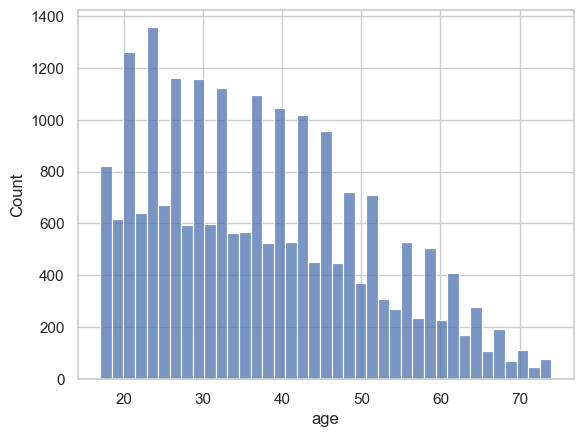

In [57]:
#data distribution
sns.histplot(data=data, x=data.columns[0])

# here i verified the distribution of each column


In [58]:
# although the distribution isn't normal in most of the columns, I decided to apply standardization instead of normalization because there are many outliers and normalization is sensitive to outliers, so I use Standard Scaler

from sklearn.preprocessing import StandardScaler 
numeric_columns = ["age", "fnlwgt", "sex", "education-num", "capital-gain", "capital-loss", "income", "education_simplified", "full_time"]
scaler = StandardScaler()

x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns]) 
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

print(x_train.head())
print(x_test.head())

            age    fnlwgt  education-num       sex  capital-gain  \
19145 -0.842702 -0.261727       0.081142 -1.255754     -0.210646   
773   -0.027327  0.824431       0.485417 -1.255754     -0.210646   
13821 -0.546202 -0.154695      -1.535958  0.796334     -0.210646   
7028   0.713923  0.273423       0.081142 -1.255754     -0.210646   
27798  0.491548 -0.112526       0.081142  0.796334     -0.210646   

       capital-loss    income  outlier_age  outlier_fnlwgt  \
19145     -0.195685 -0.462671        False           False   
773       -0.195685  2.161362        False           False   
13821     -0.195685 -0.462671        False           False   
7028      -0.195685 -0.462671        False           False   
27798     -0.195685 -0.462671        False           False   

       outlier_education-num  outlier_sex  outlier_capital-gain  \
19145                  False        False                 False   
773                    False        False                 False   
13821            

In [59]:
# Save preprocessed data in csv files
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)


In [60]:
x_train.to_csv("x_train.csv", index=False)
x_test.to_csv("x_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)